In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from datetime import date, timedelta
# inputフォルダに格納されているファイルの一覧を出力
basePath = '/content/drive/My Drive/CodeSeterpie/PredictFutureSales/input'
for dirname, _, filenames in os.walk(basePath):
    for filename in filenames:
        
        print(os.path.join(dirname, filename))

# データを読み込み
item_categories = pd.read_csv(basePath + '/item_categories.csv')
items = pd.read_csv(basePath + '/items.csv')
sales_train = pd.read_csv(basePath + '/sales_train.csv')
sample_submission = pd.read_csv(basePath + '/sample_submission.csv')
shops = pd.read_csv(basePath + '/shops.csv')
test = pd.read_csv(basePath + '/test.csv')


/content/drive/My Drive/CodeSeterpie/PredictFutureSales/input/item_categories.csv
/content/drive/My Drive/CodeSeterpie/PredictFutureSales/input/items.csv
/content/drive/My Drive/CodeSeterpie/PredictFutureSales/input/sales_train.csv
/content/drive/My Drive/CodeSeterpie/PredictFutureSales/input/sample_submission.csv
/content/drive/My Drive/CodeSeterpie/PredictFutureSales/input/shops.csv
/content/drive/My Drive/CodeSeterpie/PredictFutureSales/input/test.csv


In [ ]:
df = test.copy()

df['crossjoin_key'] = 1

data_fill = pd.DataFrame({'crossjoin_key' : 1,
                          'date_block_num' : range(0, 35)})

df = pd.merge(df, data_fill, how='outer', on='crossjoin_key')

df = df.drop(['crossjoin_key'], axis=1)

df.head(40)

,ID,shop_id,item_id,date_block_num
0,0,5,5037,0
1,0,5,5037,1
2,0,5,5037,2
3,0,5,5037,3
4,0,5,5037,4
5,0,5,5037,5
6,0,5,5037,6
7,0,5,5037,7
8,0,5,5037,8
9,0,5,5037,9


In [ ]:
sales_train_groupby = sales_train.drop(['date', 'item_price'], axis=1)
sales_train_groupby = sales_train_groupby.groupby(['date_block_num', 'shop_id', 'item_id']).sum().reset_index()

sales_train_groupby.head()

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


In [ ]:
df = pd.merge(df, 
              sales_train_groupby, 
              how='left', 
              left_on=['shop_id', 'item_id', 'date_block_num'], 
              right_on=['shop_id', 'item_id', 'date_block_num'])

df.head(50)

,ID,shop_id,item_id,date_block_num,item_cnt_day
0,0,5,5037,0,NaN
1,0,5,5037,1,NaN
2,0,5,5037,2,NaN
3,0,5,5037,3,NaN
4,0,5,5037,4,NaN
5,0,5,5037,5,NaN
6,0,5,5037,6,NaN
7,0,5,5037,7,NaN
8,0,5,5037,8,NaN
9,0,5,5037,9,NaN


In [ ]:
df = df.fillna({'item_cnt_day' : 0.0})
df = df.sort_values(['date_block_num', 'ID'])
df = df.reset_index(drop=True)

print(len(df))
df.head(35)
print(df[df.date_block_num == 0])

7497000
            ID  shop_id  item_id  date_block_num  item_cnt_day
0            0        5     5037               0           0.0
1            1        5     5320               0           0.0
2            2        5     5233               0           0.0
3            3        5     5232               0           0.0
4            4        5     5268               0           0.0
...        ...      ...      ...             ...           ...
214195  214195       45    18454               0           0.0
214196  214196       45    16188               0           0.0
214197  214197       45    15757               0           1.0
214198  214198       45    19648               0           0.0
214199  214199       45      969               0           0.0

[214200 rows x 5 columns]


In [ ]:
data_num = len(test)
print(data_num)

X_base = df.values
print(X_base.shape)
#X_base = X_base.reshape([data_num, 5, -1])

#print(X_base.shape)
#print(X_base[0])

214200
(7497000, 5)


In [ ]:

L = len(df)
print(type(L))
item_cnt_day = df.iloc[:, 4]  # 終値の列のみ抽出する。
item_cnt_day = np.array(item_cnt_day)  # numpy配列に変換する。
item_cnt_day = item_cnt_day.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）

Dateblock = df.iloc[:, 3]
Dateblock = np.array(Dateblock)
Dateblock = Dateblock.reshape(-1, 1)

print(item_cnt_day)
X1 = item_cnt_day[0*214200:L-5*214200, :]  # 予測対象日の3日前のデータ
X2 = item_cnt_day[1*214200:L-4*214200, :]  # 予測対象日の2日前のデータ
X3 = item_cnt_day[2*214200:L-3*214200, :]  # 予測対象日の前日データ
X4 = item_cnt_day[3*214200:L-2*214200, :]  # 予測対象日の前日データ
X5 = item_cnt_day[4*214200:L-1*214200, :]  # 予測対象日の前日データ
item_cnt_day = item_cnt_day[5*214200:L, :]  # 予測対象日のデータ
Dateblock = Dateblock[5*214200:L, :]

X = np.concatenate([Dateblock, X1, X2, X3, X4, X5], axis=1)  # numpy配列を結合する。

print(X)

<class 'int'>
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[[ 5.  0.  0.  0.  0.  0.]
 [ 5.  0.  0.  0.  0.  0.]
 [ 5.  0.  0.  0.  0.  0.]
 ...
 [34.  0.  0.  0.  0.  0.]
 [34.  0.  0.  0.  0.  0.]
 [34.  0.  0.  0.  0.  0.]]


In [ ]:
scaler = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler.fit(X)  # スケーリングに使用する最小／最大値を計算する。
X = scaler.transform(X)  # Xをを0～1の範囲にスケーリングする。

scaler1 = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler1.fit(item_cnt_day)  # スケーリングに使用する最小／最大値を計算する。
item_cnt_day = scaler1.transform(item_cnt_day)  # Yをを0～1の範囲にスケーリングする。
print(X)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 3次元配列に変換する。



print(X)

[[0.         0.00305577 0.00305577 0.00305577 0.00305577 0.00177226]
 [0.         0.00305577 0.00305577 0.00305577 0.00305577 0.00177226]
 [0.         0.00305577 0.00305577 0.00305577 0.00305577 0.00177226]
 ...
 [1.         0.00305577 0.00305577 0.00305577 0.00305577 0.00177226]
 [1.         0.00305577 0.00305577 0.00305577 0.00305577 0.00177226]
 [1.         0.00305577 0.00305577 0.00305577 0.00305577 0.00177226]]
[[[0.         0.00305577 0.00305577 0.00305577 0.00305577 0.00177226]]

 [[0.         0.00305577 0.00305577 0.00305577 0.00305577 0.00177226]]

 [[0.         0.00305577 0.00305577 0.00305577 0.00305577 0.00177226]]

 ...

 [[1.         0.00305577 0.00305577 0.00305577 0.00305577 0.00177226]]

 [[1.         0.00305577 0.00305577 0.00305577 0.00305577 0.00177226]]

 [[1.         0.00305577 0.00305577 0.00305577 0.00305577 0.00177226]]]


In [ ]:
print(X.shape)
print(X.shape[0])
print(X.shape[1])


(6426000, 1, 6)
6426000
1


In [ ]:
# train, testデータを定義
X_train = X[:6211800, :, :]
X_test = X[6211800:, :, :]
Y_train = item_cnt_day[:6211800, :]
Y_test = item_cnt_day[6211800:, :]

print(len(X_train))
print(len(X_test))

6211800
214200


In [ ]:
model = Sequential()
model.add(LSTM(10, 
               activation = 'tanh', 
               input_shape = (1,6), 
               recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))

model.compile(loss= 'mean_squared_error', 
              optimizer = 'rmsprop', 
              metrics=[metrics.mae])
model.fit(X_train, Y_train, epochs=1, verbose=2)
Predict = model.predict(X_test)


194119/194119 - 335s - loss: 2.5275e-06 - mean_absolute_error: 5.7818e-04


In [ ]:
print(Y_test)
print(Predict)

[[0.00177226]
 [0.00177226]
 [0.00177226]
 ...
 [0.00177226]
 [0.00177226]
 [0.00177226]]
[[0.00183963]
 [0.00161048]
 [0.00196511]
 ...
 [0.00161048]
 [0.00161048]
 [0.00161048]]


In [ ]:
# オリジナルのスケールに戻す、タイムインデックスを付ける。
Y_train = scaler1.inverse_transform(Y_train)
Y_train = pd.DataFrame(Y_train)
#Y_train.index = pd.to_datetime(df.iloc[5:705,0])

Y_test = scaler1.inverse_transform(Y_test)
Y_test = pd.DataFrame(Y_test)
#Y_test.index = pd.to_datetime(df.iloc[705:,0])

Predict = scaler1.inverse_transform(Predict)
Predict = pd.DataFrame(Predict)
#Predict.index=pd.to_datetime(df.iloc[705:,0])

print(Y_test)
print(Predict)

          0
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
...     ...
214195  0.0
214196  0.0
214197  0.0
214198  0.0
214199  0.0

[214200 rows x 1 columns]
               0
0       0.152035
1      -0.365139
2       0.435246
3      -0.275719
4      -0.365139
...          ...
214195 -0.172530
214196 -0.365139
214197 -0.365139
214198 -0.365139
214199 -0.365139

[214200 rows x 1 columns]


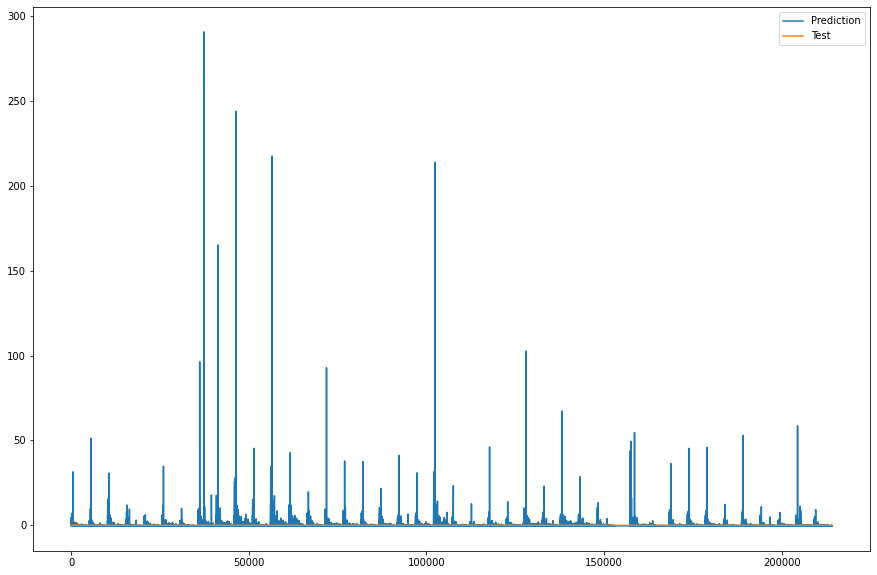

In [ ]:
plt.figure(figsize=(15,10), facecolor='white')
plt.plot(Predict, label = 'Prediction')
plt.plot(Y_test, label = 'Test')
plt.legend(loc='best')
plt.show()

In [ ]:
sub = Predict.copy()
sub.columns = ['item_cnt_month']
sub['ID'] = sub.index
sub = sub.loc[:, ['ID', 'item_cnt_month']]

print(sub)

sub.to_csv('sub.csv', index=False)

            ID  item_cnt_month
0            0        0.152035
1            1       -0.365139
2            2        0.435246
3            3       -0.275719
4            4       -0.365139
...        ...             ...
214195  214195       -0.172530
214196  214196       -0.365139
214197  214197       -0.365139
214198  214198       -0.365139
214199  214199       -0.365139

[214200 rows x 2 columns]
